<a href="https://colab.research.google.com/github/swethanjali24/random_forest_assignment/blob/main/water_qualityAssessment_random_forestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# importing  important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [20]:
# reading the data
df=pd.read_csv('/content/drive/MyDrive/assignments-BE/RandomForest/waterQuality1.csv.xls')


In [36]:
df.head()# all are numeric
df['is_safe'].value_counts()# highly imbalanced data
df.isnull().sum()# no null values
df.duplicated().sum()# no duplicate values
df['is_safe'].unique()
df['is_safe'].value_counts()# 3 labels ar not valid so we remove them
df=df.drop(df[df['is_safe']=='#NUM!'].index)# dropped the null values
df['is_safe'].value_counts()
df.head()
df.info()
df['ammonia']=df['ammonia'].astype(float)# as they are of type object
df['is_safe']=df['is_safe'].astype(int)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [22]:
# Separating input and output
X=df.drop('is_safe',axis=1)
y=df['is_safe']

In [23]:
# preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [24]:
# Performing train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [25]:
# Loading the model
model=RandomForestClassifier()

In [26]:
# predicting
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [28]:
#Evaluation
print('Training accuracy score:',accuracy_score(y_train,y_pred_train))
print('Training precsion score:',precision_score(y_train,y_pred_train))
print('Training recall score:',recall_score(y_train,y_pred_train))
print('Training f1 score:',f1_score(y_train,y_pred_train))

print('\nTesting accuracy score:',accuracy_score(y_test,y_pred))
print('Testing precsion score:',precision_score(y_test,y_pred))
print('Testing recall score:',recall_score(y_test,y_pred))
print('Testing f1 score:',f1_score(y_test,y_pred))

Training accuracy score: 1.0
Training precsion score: 1.0
Training recall score: 1.0
Training f1 score: 1.0

Testing accuracy score: 0.9625
Testing precsion score: 0.9618320610687023
Testing recall score: 0.6961325966850829
Testing f1 score: 0.8076923076923077


In [27]:
# model is overfitted and recall score may be improved

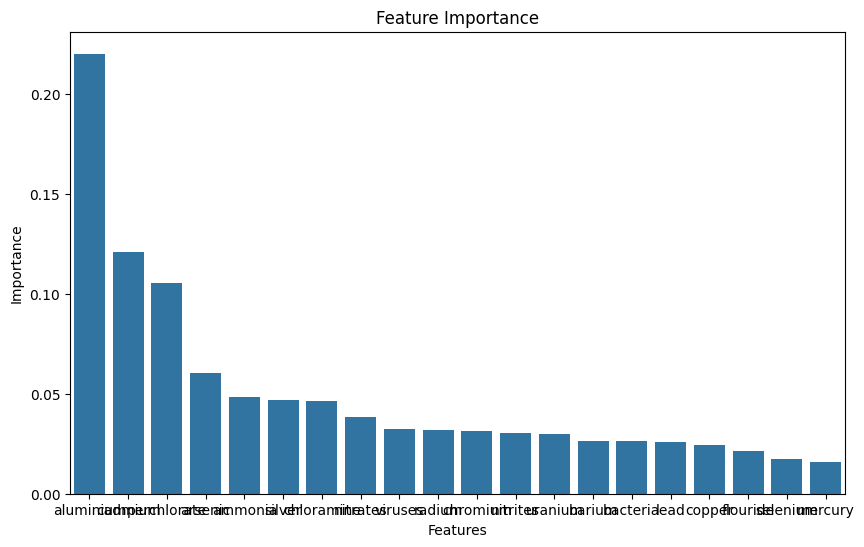

aluminium      0.220094
cadmium        0.120744
perchlorate    0.105529
arsenic        0.060341
ammonia        0.048335
silver         0.047058
chloramine     0.046481
nitrates       0.038140
viruses        0.032212
radium         0.032061
chromium       0.031151
nitrites       0.030582
uranium        0.029668
barium         0.026608
bacteria       0.026433
lead           0.025748
copper         0.024339
flouride       0.021523
selenium       0.017246
mercury        0.015706
dtype: float64


In [35]:
# features importance
X=pd.DataFrame(X,columns=df.columns[:-1])
feature_importance=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y=feature_importance,x=feature_importance.index)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()
print(feature_importance)

In [ ]:
'''
Almost 12-13 features are of same level of importance ,so better not to ignore them,and use all
'''

In [38]:
# using gridsearchcv
from sklearn.model_selection import GridSearchCV
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [ 50, 10],
    'min_samples_split' : [ 4, 7, 2],
    'min_samples_leaf' : [ 3,4]
}

In [39]:
model=RandomForestClassifier()
grid_search=GridSearchCV(estimator=model,param_grid=params,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [50, 10], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [4, 7, 2]})

In [40]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [41]:
model=RandomForestClassifier(criterion='entropy',max_depth=50,min_samples_leaf=3,min_samples_split=4)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [42]:
# performance evaluation

print('Training accuracy score:',accuracy_score(y_train,y_pred_train))
print('Training precsion score:',precision_score(y_train,y_pred_train))
print('Training recall score:',recall_score(y_train,y_pred_train))
print('Training f1 score:',f1_score(y_train,y_pred_train))

print('\nTesting accuracy score:',accuracy_score(y_test,y_pred))
print('Testing precsion score:',precision_score(y_test,y_pred))
print('Testing recall score:',recall_score(y_test,y_pred))
print('Testing f1 score:',f1_score(y_test,y_pred))


Training accuracy score: 0.9962476547842402
Training precsion score: 1.0
Training recall score: 0.9671682626538988
Training f1 score: 0.9833101529902643

Testing accuracy score: 0.959375
Testing precsion score: 0.9461538461538461
Testing recall score: 0.6795580110497238
Testing f1 score: 0.7909967845659164


In [ ]:
# REcall score didn't improve due to imbalance in data
